In [ ]:
from pose_graph import PoseGraph
import numpy as np

In [ ]:
sensor_id = ["cam0", "cam1", "imu0", "imu1"]

pose_id = ["cam1", "cam2", "cam3", "cam4", "cam5"]

poses = {
    "cam1": [[1, "M"], [2, "N"], [3, "O"], [4, "P"], [5, "Q"]],
    "cam2": [(2, "N")],
    "cam3": [(3, "O")],
    "cam4": [(4, "P")],
    "cam5": [(5, "Q")],
}

# for pose in poses.items():
#     print(pose[1][1])

if 1 not in poses["cam1"]:
    print("not in")

print(poses["cam1"])


In [ ]:
edge = {"sensor": {"cam0": 1, "cam1": 2, "imu0": 3, "imu1": 4}}

# if "sensor" in edge:
#     print("yes")

# else:
#     print("no") 

# try:
#     edge["sensor"]["cam2"]
#     print("yes")
# except KeyError:
#     print("no")

if "cam0" in edge.get("sensor",{}):
    print("yes")


str1 = "cam0"

list1 = ["cam0", "cam1", "cam2", "cam3", "cam4", "cam5"]
newstr = "cam6"+str1
list1.append("cam6"+str1)
print(list1)

In [1]:
from pose_graph import PoseGraph
import numpy as np
pg = PoseGraph()

sensor_id = "1"

tf11 = np.array(
    [
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1],
    ],
    dtype=np.float32,
)

tf12 = np.array(
    [
        [1, 0, 0, 1],
        [0, 1, 0, 2],
        [0, 0, 1, 3],
        [0, 0, 0, 1],
    ],
    dtype=np.float32,
)

tf13 = np.array(
    [
        [1, 0,	0,	10],
        [0,0.707106781186548,	-0.707106781186548,	2],
        [0,0.707106781186548,	0.707106781186548,	10],
        [0, 0, 0, 1],
    ],
    dtype=np.float32,
)

tf14 = np.array(
    [
        [0, -0.866025403784439,	0.500000000000000,	0],
        [1,     0,	0,	0],
        [0, 0.5,	0.866025403784439,	-5],
        [0, 0, 0, 1],
    ],
    dtype=np.float32,
)

pg.add_sensor(
    sensor_id,
    {
        "1": [tf11, True],
        "2": [tf12, True],
        "3": [tf13, True],
        # "4": [tf14, True],
    },
)

sensor_id = "5"

tf52 = np.array(
    [
        [1, 0, 0, 1],
        [0, 0, 1, -17],
        [0, -1, 0, 8],
        [0, 0, 0, 1],
    ],
    dtype=np.float32,
)

tf53 = np.array(
    [
        [1,	0,	0,	10],
        [0,	0.707106781186548,	0.707106781186548,	-10],
        [0,	-0.707106781186548,	0.707106781186548,	8],
        [0, 0, 0, 1],
    ],
    dtype=np.float32,
)

tf54 = np.array(
    [
        [0, -0.866025403784439,	0.500000000000000, 0],
        [0, 0.500000000000000,	0.866025403784439,	-25],
        [-1, 0, 0, 10],
        [0, 0, 0, 1],
    ],
    dtype=np.float32,
)

pg.add_sensor(
    sensor_id,
    {
        "2": [tf52, True],
        "3": [tf53, True],
        "4": [tf54, True],
    },
)

pg.update_graph(
    "1",
    {
        "2": [tf12, False],
        "3": [tf13, True],
        "4": [tf14, True],
    },
)

tf14 = pg.get_transform(parent_id="1", child_id="1", solver_method="BFS")

print(tf14)



# print(pg.object_id)
# print(pg.edges)

The object 4  is not in the graph, add it to the graph ... 
The edge between the parent node and the child node is active.
Directly return the transformation
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [ ]:
from matplotlib import pyplot as plt

figure=plt.figure()
figure.set_size_inches(10,10)
ax=figure.add_subplot(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-0.5, 0.5)
ax.set_zlim(-0.5, 0.5)


for i in range(100):
    ax.clear()
    tf11 = np.array(
        [
            [1, 0, 0, 0],
            [0, np.cos(i/100), -np.sin(i/100), 0],
            [0, np.sin(i/100), np.cos(i/100), i/500],
            [0, 0, 0, 1],
        ],
        dtype=np.float32,
    )

    pg.update_graph(
        "1",
        {
            "1": [tf11, True],
        },
    )
    pg.viz_graph(ax=ax)

    plt.pause(0.1)
    plt.draw()




print(pg.object_id)

### Test the integration of posegraph and communication functions


In [ ]:
import posehub_main
import argparse
from pose_graph import PoseGraph
import numpy as np

tf12 = np.array(
    [
        [1, 0, 0, 1],
        [0, 1, 0, 2],
        [0, 0, 1, 3],
        [0, 0, 0, 1],
    ],
    dtype=np.float32,
)

tf13 = np.array(
    [
        [1, 0,	0,	10],
        [0,0.707106781186548,	-0.707106781186548,	2],
        [0,0.707106781186548,	0.707106781186548,	10],
        [0, 0, 0, 1],
    ],
    dtype=np.float32,
)

tf14 = np.array(
    [
        [0, -0.866025403784439,	0.500000000000000,	0],
        [1,     0,	0,	0],
        [0, 0.5,	0.866025403784439,	-5],
        [0, 0, 0, 1],
    ],
    dtype=np.float32,
)


pose_graph = PoseGraph()

tool_1_id = b"tool_1"
tool_2_id = b"tool_2"
tool_3_id = b"tool_3"

args_1 = argparse.Namespace(    
    sub_ip="10.203.150.51",
    sub_port="5588",
    pub_port="5589",
    sub_topic=[tool_1_id, tool_2_id, tool_3_id],
    pub_topic=[tool_1_id, tool_2_id, tool_3_id],
    sensor_name="h1"
    ) # args for h1 sensor

args_2 = argparse.Namespace(    
    sub_ip="10.203.150.51",
    sub_port="5589",
    pub_port="5580",
    sub_topic=[tool_1_id, tool_2_id, tool_3_id],
    pub_topic=[b"topic4", b"topic5", b"topic6"],
    sensor_name="h2"
    ) # args for h2 sensor

zmq_manager_1, sub_thread_1, pub_thread_1 = posehub_main.initialize_ZMQManager(
        args_1.sub_ip,
        args_1.sub_port,
        args_1.pub_port,
        args_1.sub_topic,
        args_1.pub_topic,
        args_1.sensor_name,
    )
zmq_manager_2, sub_thread_2, pub_thread_2 = posehub_main.initialize_ZMQManager(
        args_2.sub_ip, 
        args_2.sub_port, 
        args_2.pub_port, 
        args_2.sub_topic, 
        args_2.pub_topic,
        args_2.sensor_name
    )



pose_graph.add_sensor("h1", 
            {   "tool_1": [np.eye(4), True], 
                "tool_2": [np.eye(4), True], 
                "tool_3": [np.eye(4), True]
            }
            )

update_pose_sensor_1 = {
        "tool_1": [tf12, True],
        "tool_2": [tf13, True],
        "tool_3": [tf14, True],
}

pose_graph.update_graph("h1", update_pose_sensor_1)

i = 0
try:
    while True:
        # Running the main loop

        # test receiving poses
        # print('tool 1: ', zmq_manager_1.sub_poses['tool_1'])
        poseinfo = posehub_main.receive_poses(args_1, zmq_manager_1)
        # if not poseinfo: # if poseinfo is not empty
        if len(poseinfo) != 0:
            print("pose info from port 5588 \n ", poseinfo)
            # poseinfo should be a dictionary with key as object name and value is [pose, isActive]
            
        else:
            print("no poseinfo received")
        
        
        # print('tool 2: ', zmq_manager_1.sub_poses['tool_2'])
        # print('tool 3: ', zmq_manager_1.sub_poses['tool_3'])

        # test sending messages
        # get pose from pose graph
        for topic in args_1.pub_topic:
            # transfer the topic from bytes to string
            pose = pose_graph.get_transform("h1", topic.decode("utf-8"), solver_method="BFS")
            posehub_main.send_poses(topic,zmq_manager_1, pose)

        # test receiving poses
        poseinfo_subscribed = posehub_main.receive_poses(args_2, zmq_manager_2)
        if poseinfo_subscribed is not None:
            print("pose info from port 5589 \n ",poseinfo_subscribed)
            # poseinfo should be a dictionary with key as object name and value is [pose, isActive]
            pose_graph.update_graph("h1", poseinfo)
        else:
            print("no poseinfo received")

        i += 1e-6


except KeyboardInterrupt:
    posehub_main.terminate_ZMQManager(zmq_manager_1, sub_thread_1, pub_thread_1)
    # terminate_ZMQManager(zmq_manager_2, sub_thread_2, pub_thread_2)



# Plot time sequence test data

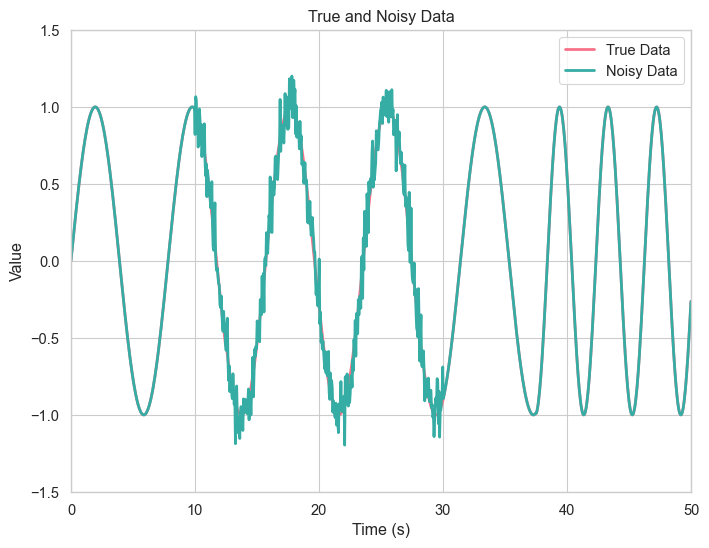

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate some example data (replace this with your data)
time = np.linspace(0, 50, 1000)  # Time from 0s to 50s

# Create a function to generate a sine wave within a specified time range
def generate_sine_wave(start_time, end_time, num_points):
    time_range = np.linspace(start_time, end_time, num_points)
    return np.sin(time_range)

# Define the time period where you want to add noise (e.g., from 10s to 30s)
noise_start_time = 10
noise_end_time = 30

# Generate the true data
true_data = np.concatenate(
    [generate_sine_wave(0, noise_start_time, 250),
     generate_sine_wave(noise_start_time, noise_end_time, 500),
     generate_sine_wave(noise_end_time, 50, 250)]
)

# Add Gaussian noise with mean 0 and standard deviation 0.1 to the specified time period
noise_amplitude = 0.1
noise_indices = (time >= noise_start_time) & (time <= noise_end_time)
data = true_data.copy()
data[noise_indices] += np.random.normal(0, noise_amplitude, np.sum(noise_indices))

# Create a Seaborn style and set context for a publication-quality plot
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.2)

# Create the plot
plt.figure(figsize=(8, 6))

# Define a Seaborn color palette with distinct colors
colors = sns.color_palette("husl", 2)

# Plot the true data
sns.lineplot(x=time, y=true_data, label="True Data", linewidth=2, color=colors[0])

# Plot the noisy data
sns.lineplot(x=time, y=data, label="Noisy Data", linewidth=2, color=colors[1])

# Customize the plot
plt.xlim(0, 50)
plt.ylim(-1.5, 1.5)
plt.xlabel("Time (s)")
plt.ylabel("Value")
plt.title("True and Noisy Data")
plt.legend(loc="upper right")

# Save or display the plot
plt.savefig("time_sequence_plot_with_true_and_noisy_data.png", dpi=300)
plt.show()


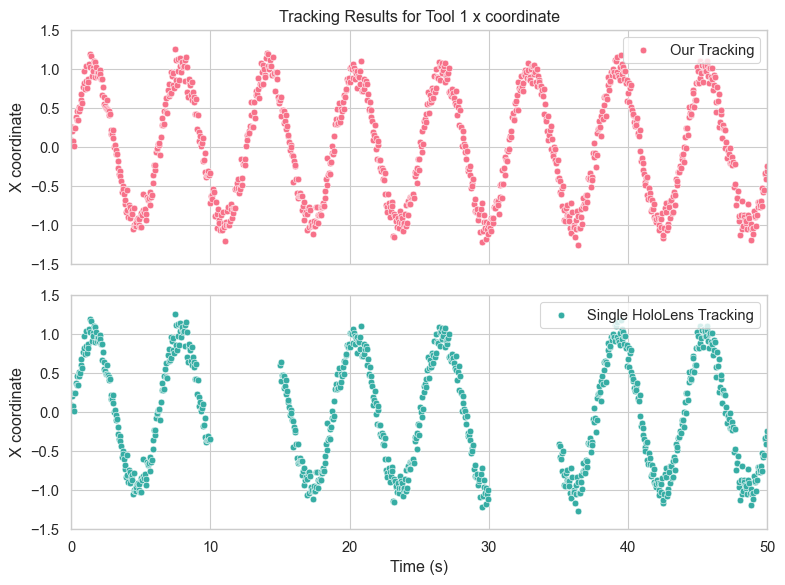

In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate some example data with noise (replace this with your data)
time = np.linspace(0, 50, 1000)  # Time from 0s to 50s
true_data = np.sin(time)  # True data, replace with your data
noise = np.random.normal(0, 0.1, len(time))  # Add Gaussian noise with mean 0 and standard deviation 0.1
full_data = true_data + noise  # Data with noise


missing_data_indices = (time >= 10) & (time <= 15) | (time >= 30) & (time <= 35)  # Indices of missing data
incomplete_data = full_data.copy()  # Copy the full data
incomplete_data[missing_data_indices] = np.nan  # Set the missing data to NaN

# Create a Seaborn style and set context for a publication-quality plot
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.2)

# Create a figure with two vertically tiled subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Define a Seaborn color palette with distinct colors
colors = sns.color_palette("husl", 2)

# Plot the true data in the first subplot
sns.scatterplot(x=time, y=full_data, label="Our Tracking", color=colors[0], ax=axes[0])
axes[0].set_ylabel("X coordinate")
axes[0].set_title("Tracking Results for Tool 1 x coordinate")
axes[0].set_ylim(-1.5, 1.5)

axes[0].legend(loc="upper right")

# Plot the noisy data in the second subplot
sns.scatterplot(x=time, y=incomplete_data, label="Single HoloLens Tracking", color=colors[1], ax=axes[1])
axes[1].set_xlabel("Time (s)")
axes[1].set_ylabel("X coordinate")
axes[1].set_ylim(-1.5, 1.5) 


# Customize the plot
plt.xlim(0, 50)  # Set X-axis limits
plt.ylim(-1.5, 1.5)  # Set Y-axis limits

# Add legend to the second subplot
axes[1].legend(loc="upper right")

# Adjust subplot spacing
plt.tight_layout()

# Save or display the plot
plt.savefig("time_sequence_plot_with_true_and_noisy_data.png", dpi=300)  # Save the plot as an image
plt.show()  # Display the plot
